# Introducción y carga de datos

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# roc
from sklearn.metrics import roc_curve, roc_auc_score, auc


Carga datos de dataset

Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
Tras observar los datos de un día dado, el objetivo es predecir las variables target:

- RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.

In [308]:
df = pd.read_csv('weatherAUS.csv')
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [309]:
len(df)

145460

Seleccionamos 10 ciudades aleatoriamente.

In [310]:
# Semilla para reproducibilidad
random.seed(42)
ciudades = random.sample(df["Location"].unique().tolist(), 10)
ciudades

['Perth',
 'NorfolkIsland',
 'BadgerysCreek',
 'MountGinini',
 'Canberra',
 'Wollongong',
 'Penrith',
 'NorahHead',
 'Nuriootpa',
 'Newcastle']

Veamos los tipos y la cantidad de observaciones.

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Vemos que tenemos 22 variables, de las cuales 16 son numéricas, 5 categóricas y fecha será de tipo date. Por otro lado, tenemos la variable Location, que eliminaremos a continuación. 

Droppeamos los valores faltantes para la variable objetivo. El resto de valores nulos serán tratados más adelante.

In [312]:
df = df.dropna(subset=['RainTomorrow']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [313]:
df = df[df["Location"].isin(ciudades)].reset_index(drop=True).drop(columns=["Location"])
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Análisis exploratorio y selección de características

## Visualización de los datos

Hechemos un vistazo a los datos que contiene nuestro dataframe.

In [314]:
df_train.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
24560,2010-05-29,9.5,12.9,12.0,1.0,3.2,W,69.0,W,WSW,...,91.0,89.0,1008.7,1009.8,6.0,8.0,9.6,12.2,Yes,Yes
16432,2013-11-23,17.8,22.3,6.8,NaN,NaN,N,33.0,SSE,E,...,85.0,81.0,1005.7,1003.6,NaN,4.0,19.8,20.9,Yes,No
4400,2013-04-13,14.2,25.5,0.0,NaN,NaN,NaN,NaN,NaN,SE,...,91.0,64.0,NaN,NaN,5.0,1.0,17.0,24.2,No,No
8604,2016-11-30,19.2,25.6,0.0,NaN,NaN,N,63.0,S,E,...,70.0,67.0,1012.6,1010.0,NaN,NaN,22.9,24.3,No,No
7261,2013-01-21,19.9,26.8,3.6,NaN,NaN,ENE,22.0,SSW,ENE,...,82.0,66.0,1015.8,1013.8,NaN,NaN,24.0,25.8,Yes,No


Identificamos los tipos de datos de cada columna, y la cantidad de datos faltantes en cada columna, comparándolo con el tamaño del dataframe.

In [315]:
df_train.info()
print("\nTamaño del dataframe:")
df_train.shape

<class 'pandas.core.frame.DataFrame'>
Index: 24194 entries, 24560 to 23654
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24194 non-null  object 
 1   MinTemp        23874 non-null  float64
 2   MaxTemp        24042 non-null  float64
 3   Rainfall       23917 non-null  float64
 4   Evaporation    8526 non-null   float64
 5   Sunshine       8093 non-null   float64
 6   WindGustDir    21341 non-null  object 
 7   WindGustSpeed  21356 non-null  float64
 8   WindDir9am     21399 non-null  object 
 9   WindDir3pm     22708 non-null  object 
 10  WindSpeed9am   23627 non-null  float64
 11  WindSpeed3pm   23123 non-null  float64
 12  Humidity9am    23563 non-null  float64
 13  Humidity3pm    23185 non-null  float64
 14  Pressure9am    16839 non-null  float64
 15  Pressure3pm    16868 non-null  float64
 16  Cloud9am       12322 non-null  float64
 17  Cloud3pm       11203 non-null  float64
 18  Temp9am

(24194, 22)

Algunas medidas de resumen de las variables numéricas de datos.

In [316]:
df_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,23874.000000,24042.000000,23917.000000,8526.000000,8093.000000,21356.000000,23627.000000,23123.000000,23563.000000,23185.000000,16839.000000,16868.000000,12322.000000,11203.000000,23677.000000,23269.000000
mean,11.651525,21.830634,2.601238,4.998053,7.789374,39.697649,12.244551,17.044069,71.859950,56.283071,1018.273484,1015.980318,4.531245,4.551370,16.173561,20.311634
std,6.317636,6.875519,8.445802,3.337659,3.662865,14.486898,9.182497,9.346625,17.722962,20.554315,6.849742,6.691395,2.862065,2.700936,6.082453,6.695757
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,2.000000,982.000000,985.500000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.900000,0.000000,2.600000,5.300000,30.000000,6.000000,9.000000,60.000000,41.000000,1013.800000,1011.500000,1.000000,2.000000,12.400000,16.600000
50%,12.400000,21.700000,0.000000,4.200000,8.500000,37.000000,11.000000,17.000000,73.000000,56.000000,1018.300000,1016.000000,5.000000,5.000000,16.800000,20.200000
75%,16.600000,25.800000,0.800000,6.800000,10.600000,48.000000,17.000000,22.000000,85.000000,71.000000,1022.900000,1020.500000,7.000000,7.000000,20.600000,24.200000
max,29.700000,46.900000,216.300000,74.800000,14.300000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.200000,1037.800000,9.000000,8.000000,39.000000,46.200000


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

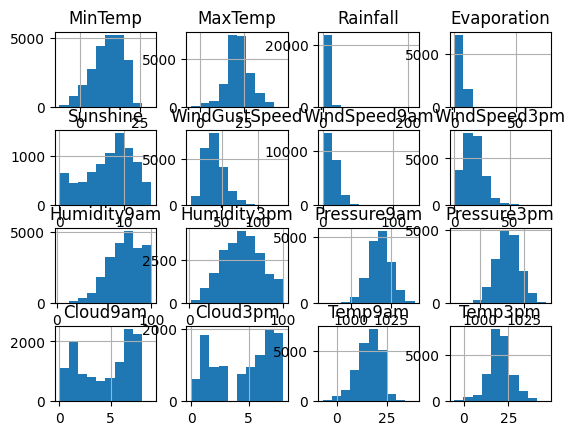

In [317]:
df_train.hist()

## Gráficos univariados

Graficamos las diferentes variables del dataframe, para dar un primer pantallazo de nuestro datos, y a su vez, chequeamos el balanceo de las variables.

### Variable objetivo - RainTomorrow

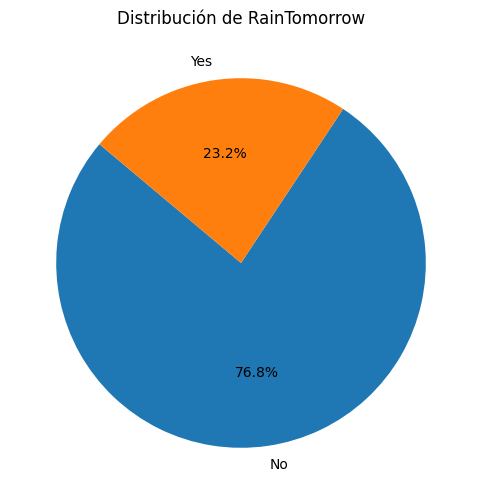

In [318]:
rain_counts = df_train['RainTomorrow'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de RainTomorrow')
plt.show()

Vemos que hay una proporción de 3 a 1 en la variable objetivo, lo cual significa que está desbalanceada. Este problema debe ser considerado a la hora de entrenar al modelo para evitar que se limite a predecir la categoría dominante.

### Lluvia

Buscamos predecir si lloverá un día con los datos de días anteriores. Para esto, es vital que conozcamos cómo se ven estos datos:

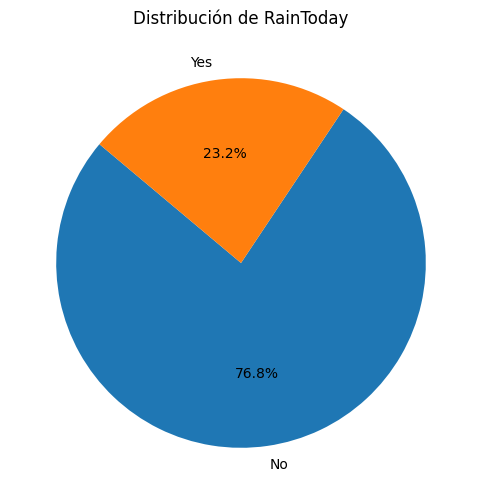

In [319]:
rain_counts = df_train['RainToday'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de RainToday')
plt.show()

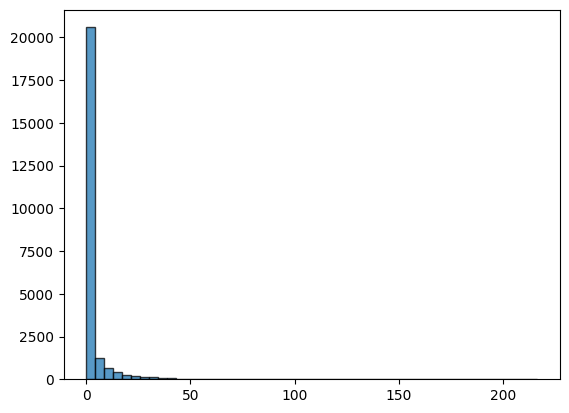

In [320]:
plt.hist(df_train.dropna(subset=['Rainfall'])['Rainfall'], bins=50, edgecolor='k', alpha=0.75)
plt.show()

In [321]:
df_train["Rainfall"].describe()

count    23917.000000
mean         2.601238
std          8.445802
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max        216.300000
Name: Rainfall, dtype: float64

Vemos que tiene una distribución de forma exponencial, con la mayoría de sus valores en 0 (hasta el 3er cuartil, los valores son 0). Esto puede explicarse ya que la mayoría de días no hubo lluvia. Es más, en el anterior gráfico, vimos que el 77% de los días no llovió, por lo que estos resultados son de esperar.

### Velocidad del Viento

Procedemos a graficar otras variables, para conocer cómo se ve nuestra base de datos.

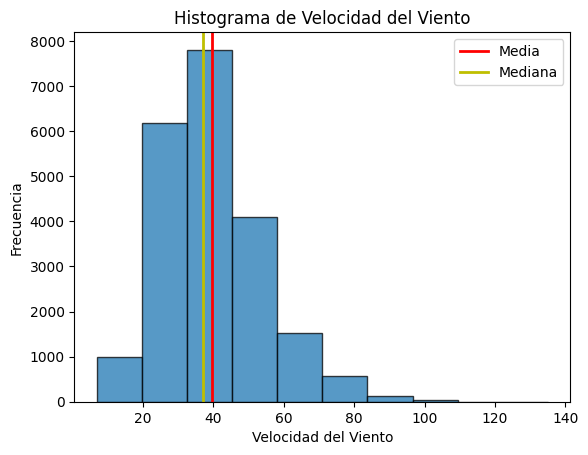

In [322]:
plt.hist(df_train['WindGustSpeed'], bins=10, edgecolor='k', alpha=0.75)
plt.axvline(df_train['WindGustSpeed'].mean(), color='r', linewidth=2)
plt.axvline(df_train['WindGustSpeed'].median(), color='y', linewidth=2)
plt.legend(['Media', 'Mediana'])
plt.xlabel('Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Velocidad del Viento')
plt.show()

Vemos que la variable tiene una distribución aproximadamente normal y levemente asimétrica hacia la derecha.

### Nubes

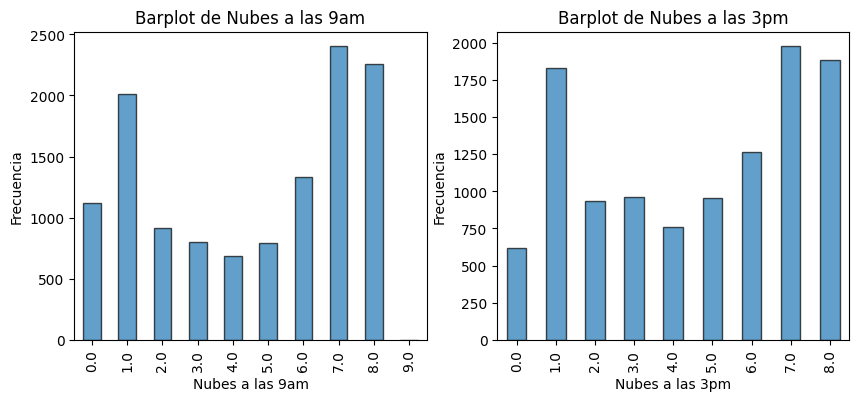

In [323]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df_train['Cloud9am'].value_counts().sort_index().plot(kind="bar", ax=axes[0], edgecolor='k', alpha=0.7)
axes[0].set_xlabel('Nubes a las 9am')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Barplot de Nubes a las 9am')

df_train['Cloud3pm'].value_counts().sort_index().plot(kind="bar", ax=axes[1], edgecolor='k', alpha=0.7)
axes[1].set_xlabel('Nubes a las 3pm')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Barplot de Nubes a las 3pm')

plt.show()


Al ser dos variables similares, es de esperar que sus distribuciones también lo sean, como se puede observar. Por otro lado, esperamos que estén altamente correlacionadas, pero no tiene por qué ser el caso con simplemente ver los gráficos.

A pesar de que inicialmente se importó como float64, la variable es numérica discreta.

### Presión

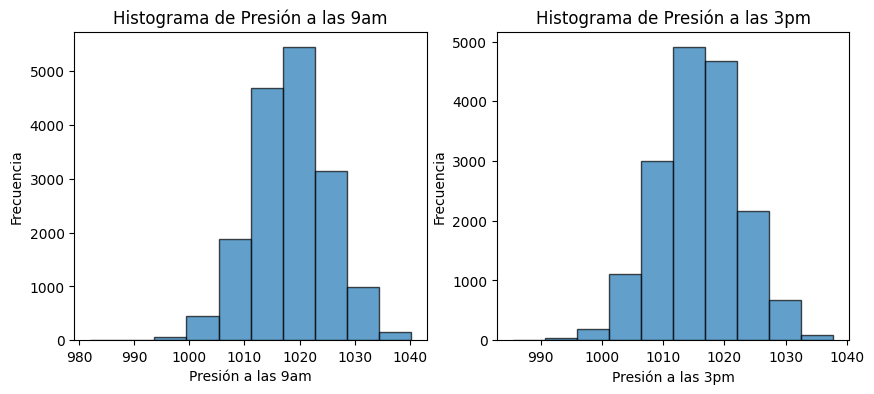

In [324]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df_train['Pressure9am'].plot.hist(ax=axes[0], bins=10, edgecolor='k', alpha=0.7)
axes[0].set_xlabel('Presión a las 9am')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Presión a las 9am')

df_train['Pressure3pm'].plot.hist(ax=axes[1], bins=10, edgecolor='k', alpha=0.7)
axes[1].set_xlabel('Presión a las 3pm')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de Presión a las 3pm')

plt.show()

Nuevamente, tenemos que estas dos variables similares tienen una distribución casi idéntica.

### Temperatura mínima y máxima

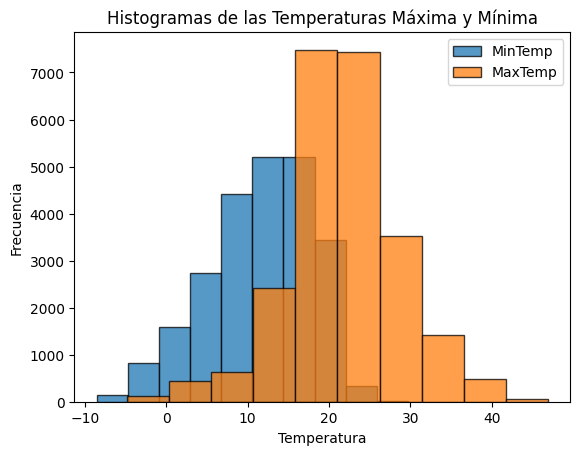

In [325]:
plt.hist(df_train['MinTemp'], bins=10, edgecolor='k', alpha=0.75, label='MinTemp')
plt.hist(df_train['MaxTemp'], bins=10, edgecolor='k', alpha=0.75, label='MaxTemp')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.title('Histogramas de las Temperaturas Máxima y Mínima')
plt.legend()
plt.show()

Vemos que la temperatura mínima y máxima siguen distribuciones aproximadamente normales, la primera asimétrica hacia la izquierda y la segunda hacia la derecha. Además podemos observar que, como es esperable, el rango de valores de estas están "desplazados" en el eje. 

### Dirección del viento

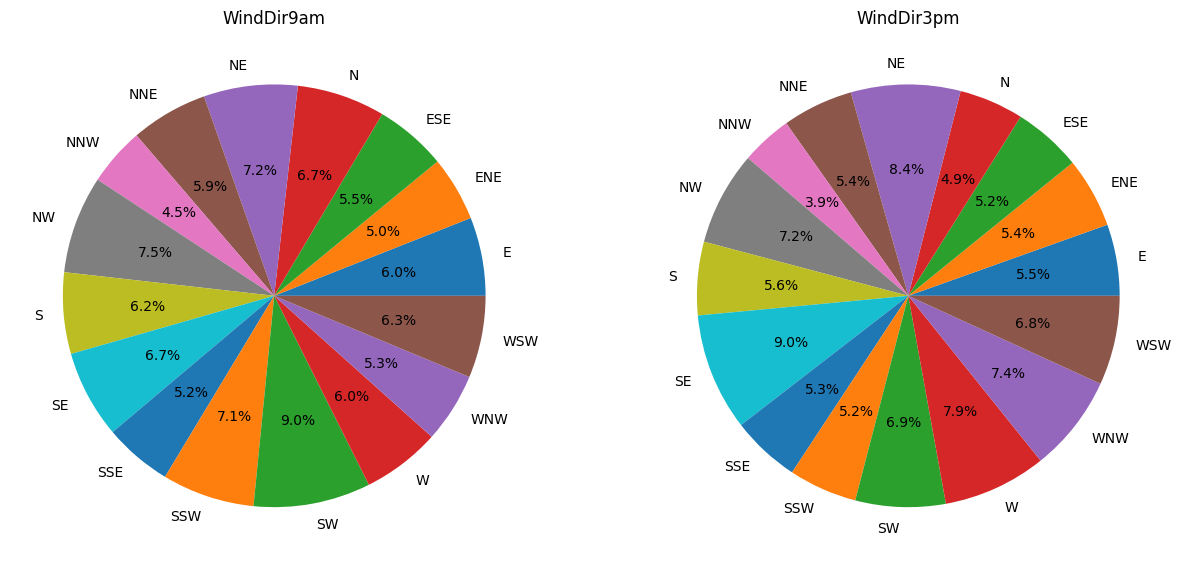

In [326]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

df_train["WindDir9am"].value_counts().sort_index().plot(kind="pie", autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('WindDir9am')
axes[0].set_ylabel('')

df_train["WindDir3pm"].value_counts().sort_index().plot(kind="pie", autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('WindDir3pm')
axes[1].set_ylabel('')

plt.show()

Vemos que la dirección del viento en ambos casos es una variable distribuida de manera casi equitativa, no habiendo ninguna clase con una frecuencia demasiado alta o baja.

### Resto de las variables numéricas

Veamos la distribución de las demás variables un un único gráfico.

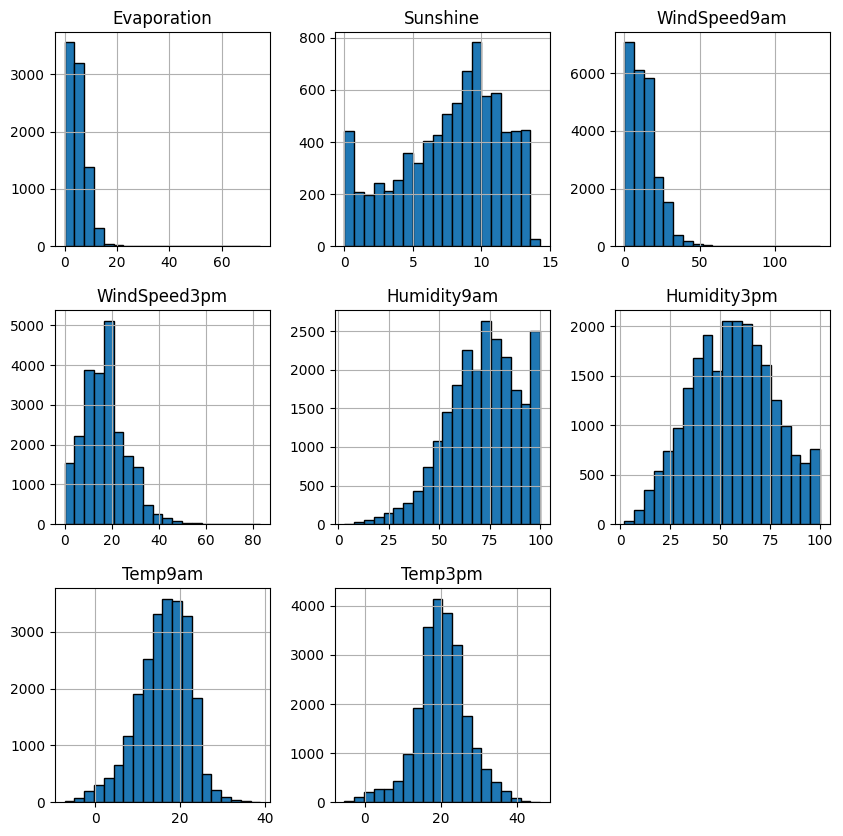

In [327]:
df_train.drop(columns=["RainTomorrow", "RainToday", "Rainfall",
                       "WindGustDir", "Pressure9am", "Pressure3pm",
                       "Cloud9am", "Cloud3pm", "WindGustSpeed",
                       "MaxTemp", "MinTemp",
                       ]).hist(bins=20, edgecolor='k', figsize=(10, 10))
plt.show()

Observamos que `Evaporation` y `WindSpeed9am` tienen distribuciones exponenciales, `Sunshine` tiene una distribución que parece normal pero con muchas observaciones con valor cercano a 0. Para el resto de variables, se observan distribuciones aproximadamente normales.

Llama la atención que la velocidad del viento tiene una distribución aparentemente exponencial mientras que a las 3pm tiene una forma más normal, aunque asimétrica hacia la derecha.

### Estudio de outliers

Estudiemos la presencia de outliers en el dataset.

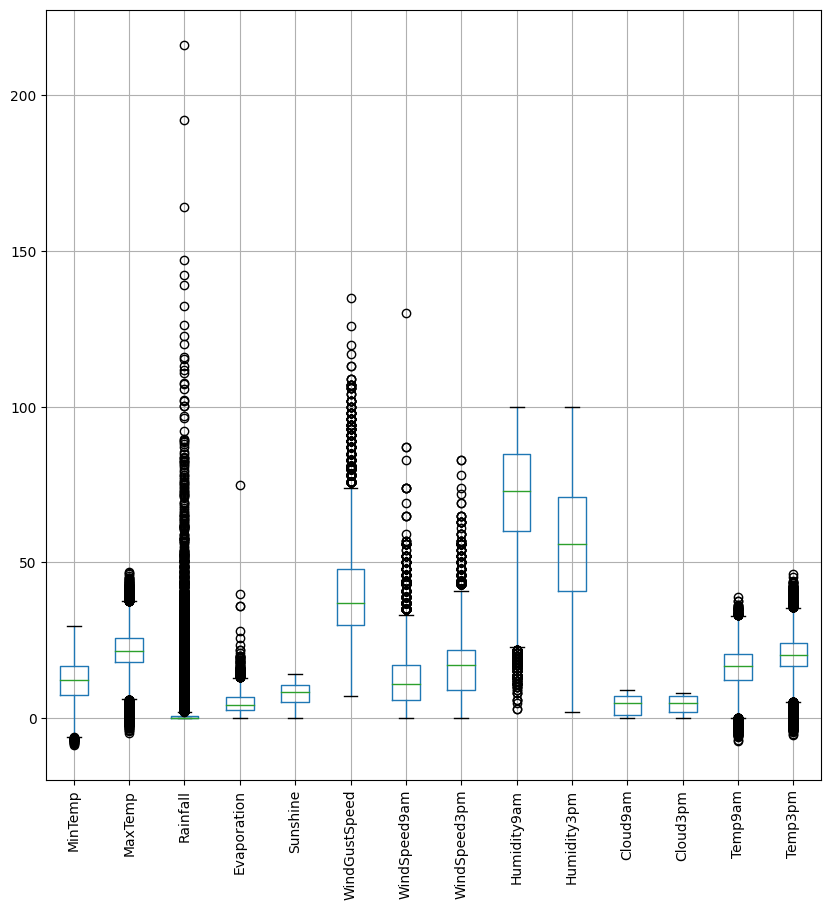

In [328]:
df_train.drop(columns=["Pressure9am", "Pressure3pm"]).boxplot(figsize=(10, 10))
plt.xticks(rotation=90)
plt.show()

Vemos que todas las variables a excepción de `Cloud9am` y `Cloud3pm` presentan gran cantidad de outliers, entre las que destaca especialmente `Rainfall` que llega a presentar valores remotos muy extremos.

## Gráficos bivariados

Veamos cómo afecta la presencia de nubes a la probabilidad de lluvia al día siguiente.

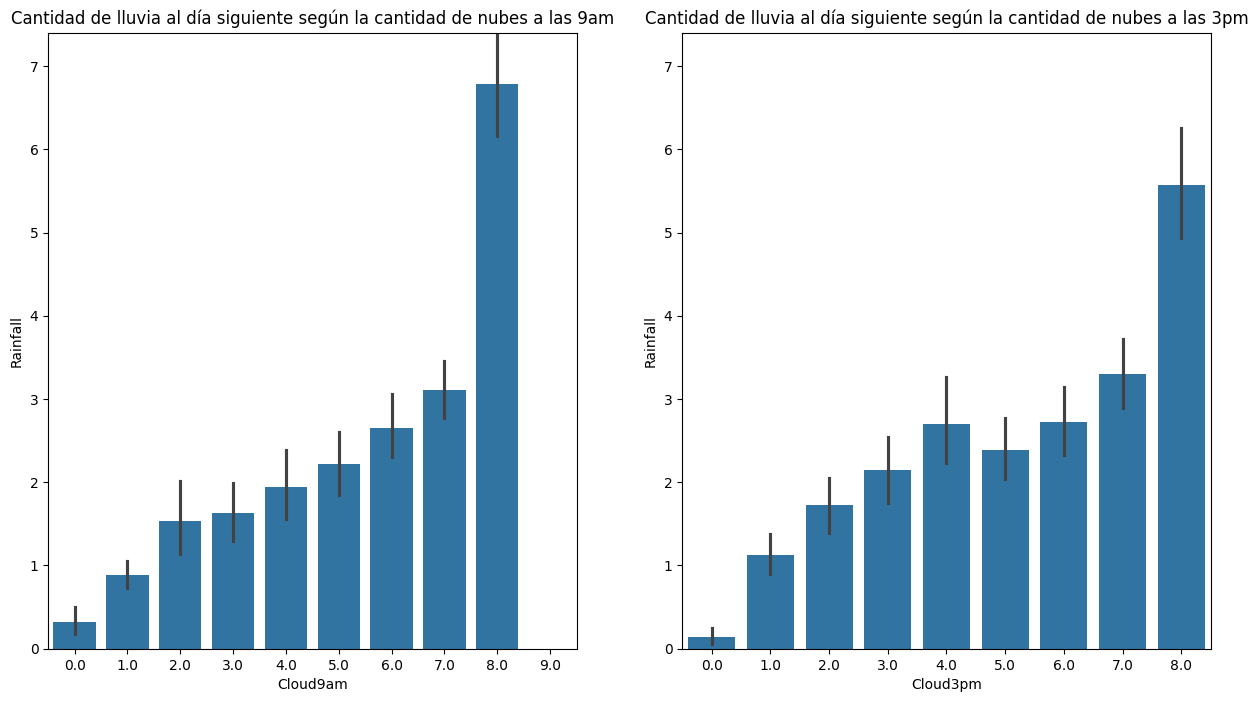

In [329]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

sns.barplot(x='Cloud9am', y='Rainfall', ax=axes[0], data=df_train)
axes[0].set_ylim(0, 7.4)
axes[0].set_title('Cantidad de lluvia al día siguiente según la cantidad de nubes a las 9am')

sns.barplot(x='Cloud3pm', y='Rainfall', ax=axes[1], data=df_train)
axes[1].set_ylim(0, 7.4)
axes[1].set_title('Cantidad de lluvia al día siguiente según la cantidad de nubes a las 3pm')
plt.show()

Estas variables tienen una aparentemente alta correlación: A medida que aumenta la cantidad de nubes, la cantidad de lluvia observada incrementa.

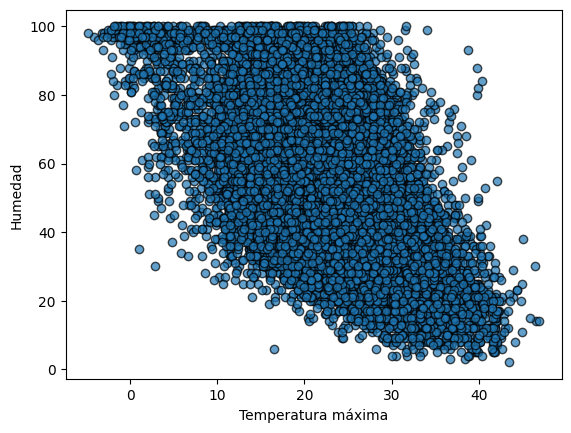

In [330]:
# evaporation y maxtemp
plt.scatter(df_train['MaxTemp'], df_train['Humidity3pm'], edgecolor='k', alpha=0.7)
plt.xlabel("Temperatura máxima")
plt.ylabel('Humedad')
plt.show()


Vemos una tendencia decreciente en la humedad a medida que la temperatura incrementa.

# Limpieza de los datos

## Codificación de variables categóricas

#### Codificamos RainToday y RainTomorrow

In [331]:
code_lluvia = {"Yes":1, "No":0}

df_train['RainToday'] = df_train["RainToday"].map(code_lluvia)
df_train['RainTomorrow'] = df_train["RainTomorrow"].map(code_lluvia)

# Lo hacemos en el df de test
df_test['RainToday'] = df_test["RainToday"].map(code_lluvia)
df_test['RainTomorrow'] = df_test["RainTomorrow"].map(code_lluvia)

Veamos si existe algún desbalanceo en los datos:

### Balanceo y formatteo de fechas

Balanceo de los años

<Axes: xlabel='Year'>

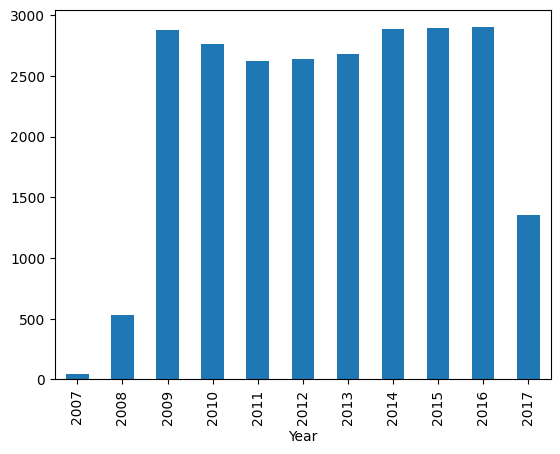

In [332]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train["Year"] = df_train["Date"].dt.year
df_train["Month"] = df_train["Date"].dt.month
nbins = len(df_train["Year"].unique())
df_train['Year'].value_counts().sort_index().plot(kind="bar")

# Hacemos lo mismo en el dataset de test
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test["Year"] = df_test["Date"].dt.year
df_test["Month"] = df_test["Date"].dt.month
df_test['Year'].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='Year'>

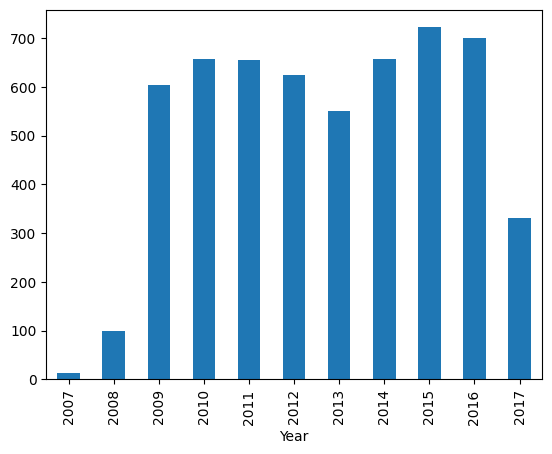

In [333]:
df_train[df_train["RainTomorrow"]==1]["Year"].value_counts().sort_index().plot(kind="bar")

Se puede observar que la variable Year no tiene una relevancia mayor en la cantidad de días de lluvia, ya que se puede ver que el barplot es muy similar al anteriomente visto, lo cual nos dice que la cantidad de lluvia en un año depende realmente casi exclusivamente de la cantidad de datos que tengamos del mismo.

Por lo tanto, no consideramos esta variable de relevancia y se la omitirá.

In [334]:
df_train = df_train.drop(columns=["Year"])

# Hacemos lo mismo en el dataset de test
df_test = df_test.drop(columns=["Year"])

Balanceo de los meses

<Axes: xlabel='Month'>

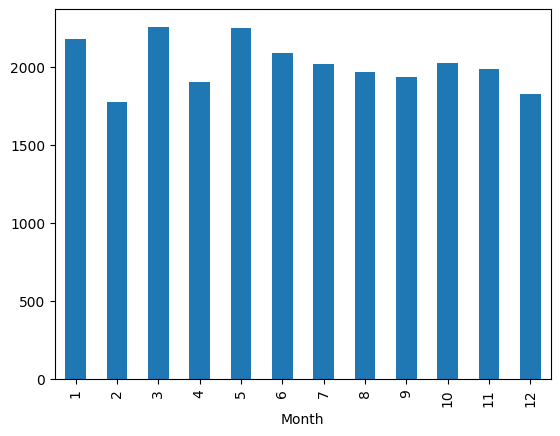

In [335]:
df_train['Month'].value_counts().sort_index().plot(kind="bar")

Observamos que existe un buen balanceo de los años y los meses.

Ahora, podemos finalmente codificar fecha

In [336]:
# get dummies de mes
df_train = pd.get_dummies(df_train, columns=['Month'], drop_first=True, dtype='int8')

# Hacemos lo mismo en el dataset de test
df_test = pd.get_dummies(df_test, columns=['Month'], drop_first=True, dtype='int8')

### Balanceo y formatteo de la dirección del viento

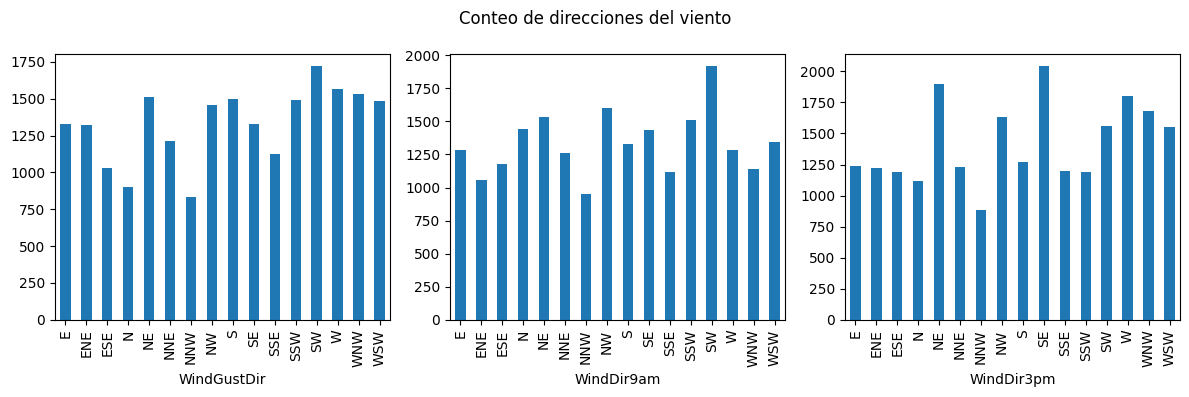

In [337]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila y 3 columnas para los gráficos

df_train['WindGustDir'].value_counts().sort_index().plot(kind="bar", ax=axes[0])
df_train['WindDir9am'].value_counts().sort_index().plot(kind="bar", ax=axes[1])
df_train['WindDir3pm'].value_counts().sort_index().plot(kind="bar", ax=axes[2])

axes[0].set_xlabel('WindGustDir')
axes[1].set_xlabel('WindDir9am')
axes[2].set_xlabel('WindDir3pm')
fig.suptitle('Conteo de direcciones del viento')

plt.tight_layout()
plt.show()

#### Codificamos la dirección del viento


Pudimos observar que la dirección del viento está relativamente balanceada. Creamos una nueva representacion numérica del viento, y dos columnas para esta nueva representación.

In [338]:
WindDirToXDir = {
    'N': 0,
    'S': 0,
    'E': 1,
    'W': -1,
    'NW': 2**0.5,
    'NE': -2**0.5,
    'SE': 2**0.5,
    'SW': -2**0.5,
    'NNW': np.cos(5*np.pi/8),
    'NNE': np.cos(3*np.pi/8),
    'ENE': np.cos(1*np.pi/8),
    'WNW': np.cos(7*np.pi/8),
    'ESE': np.cos(-1*np.pi/8),
    'SSE': np.cos(-3*np.pi/8),
    'SSW': np.cos(-5*np.pi/8),
    'WSW': np.cos(-7*np.pi/8)
}
WindDirToYDir = {
    'N': 1,
    'S': -1,
    'E': 0,
    'W': 0,
    'NW': 2**0.5,
    'NE': 2**0.5,
    'SE': -2**0.5,
    'SW': -2**0.5,
    'NNW': np.sin(3*np.pi/8),
    'NNE': np.sin(3*np.pi/8),
    'ENE': np.sin(1*np.pi/8),
    'WNW': np.sin(1*np.pi/8),
    'ESE': np.sin(-1*np.pi/8),
    'SSE': np.sin(-3*np.pi/8),
    'SSW': np.sin(-3*np.pi/8),
    'WSW': np.sin(-1*np.pi/8)
}

df_train['WindDir3pmX'] = df_train['WindDir3pm'].map(WindDirToXDir)
df_train['WindDir3pmY'] = df_train['WindDir3pm'].map(WindDirToYDir)

df_train['WindDir9amX'] = df_train['WindDir9am'].map(WindDirToXDir)
df_train['WindDir9amY'] = df_train['WindDir9am'].map(WindDirToYDir)

df_train['WindGustDirX'] = df_train['WindGustDir'].map(WindDirToXDir)
df_train['WindGustDirY'] = df_train['WindGustDir'].map(WindDirToYDir)

df_train = df_train.drop(columns=['WindDir3pm'])
df_train = df_train.drop(columns=['WindDir9am'])
df_train = df_train.drop(columns=['WindGustDir'])

# Hacemos lo mismo en el dataset de test
df_test['WindDir3pmX'] = df_test['WindDir3pm'].map(WindDirToXDir)
df_test['WindDir3pmY'] = df_test['WindDir3pm'].map(WindDirToYDir)

df_test['WindDir9amX'] = df_test['WindDir9am'].map(WindDirToXDir)
df_test['WindDir9amY'] = df_test['WindDir9am'].map(WindDirToYDir)

df_test['WindGustDirX'] = df_test['WindGustDir'].map(WindDirToXDir)
df_test['WindGustDirY'] = df_test['WindGustDir'].map(WindDirToYDir)

df_test = df_test.drop(columns=['WindDir3pm'])
df_test = df_test.drop(columns=['WindDir9am'])
df_test = df_test.drop(columns=['WindGustDir'])

### Droppeamos variable Date

Finalmente, eliminamos la variable date, pues no estaremos analizando los datos como una serie temporal.

In [339]:
df_train.drop(columns=["Date"], inplace=True)
df_test.drop(columns=["Date"], inplace=True)

## Imputación de datos faltantes

Veamos la cantidad de valores faltantes.

In [340]:
df_train.isna().sum()

MinTemp            320
MaxTemp            152
Rainfall           277
Evaporation      15668
Sunshine         16101
WindGustSpeed     2838
WindSpeed9am       567
WindSpeed3pm      1071
Humidity9am        631
Humidity3pm       1009
Pressure9am       7355
Pressure3pm       7326
Cloud9am         11872
Cloud3pm         12991
Temp9am            517
Temp3pm            925
RainToday          277
RainTomorrow         0
Month_2              0
Month_3              0
Month_4              0
Month_5              0
Month_6              0
Month_7              0
Month_8              0
Month_9              0
Month_10             0
Month_11             0
Month_12             0
WindDir3pmX       1486
WindDir3pmY       1486
WindDir9amX       2795
WindDir9amY       2795
WindGustDirX      2853
WindGustDirY      2853
dtype: int64

Debido a que hay una gran cantidad de datos faltantes, además distribuidos entre diversas variables, eliminarlos significaría una pérdida significativa de información para nuestro modelo.

Por lo tanto, haremos inputación de datos. Utilizaremos KNN ya que probó tener una buena performance en el anterior trabajo práctico.

In [341]:
imputer = KNNImputer(n_neighbors=5)

df_train_imputed = imputer.fit_transform(df_train)

df_train = pd.DataFrame(df_train_imputed, columns=df_train.columns)

df_train.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month_2          0
Month_3          0
Month_4          0
Month_5          0
Month_6          0
Month_7          0
Month_8          0
Month_9          0
Month_10         0
Month_11         0
Month_12         0
WindDir3pmX      0
WindDir3pmY      0
WindDir9amX      0
WindDir9amY      0
WindGustDirX     0
WindGustDirY     0
dtype: int64

In [342]:
df_test_imputed = imputer.transform(df_test)

df_test = pd.DataFrame(df_test_imputed, columns=df_test.columns)

# Matriz de correlación

Veamos la matriz de correlación de nuestro dataframe.

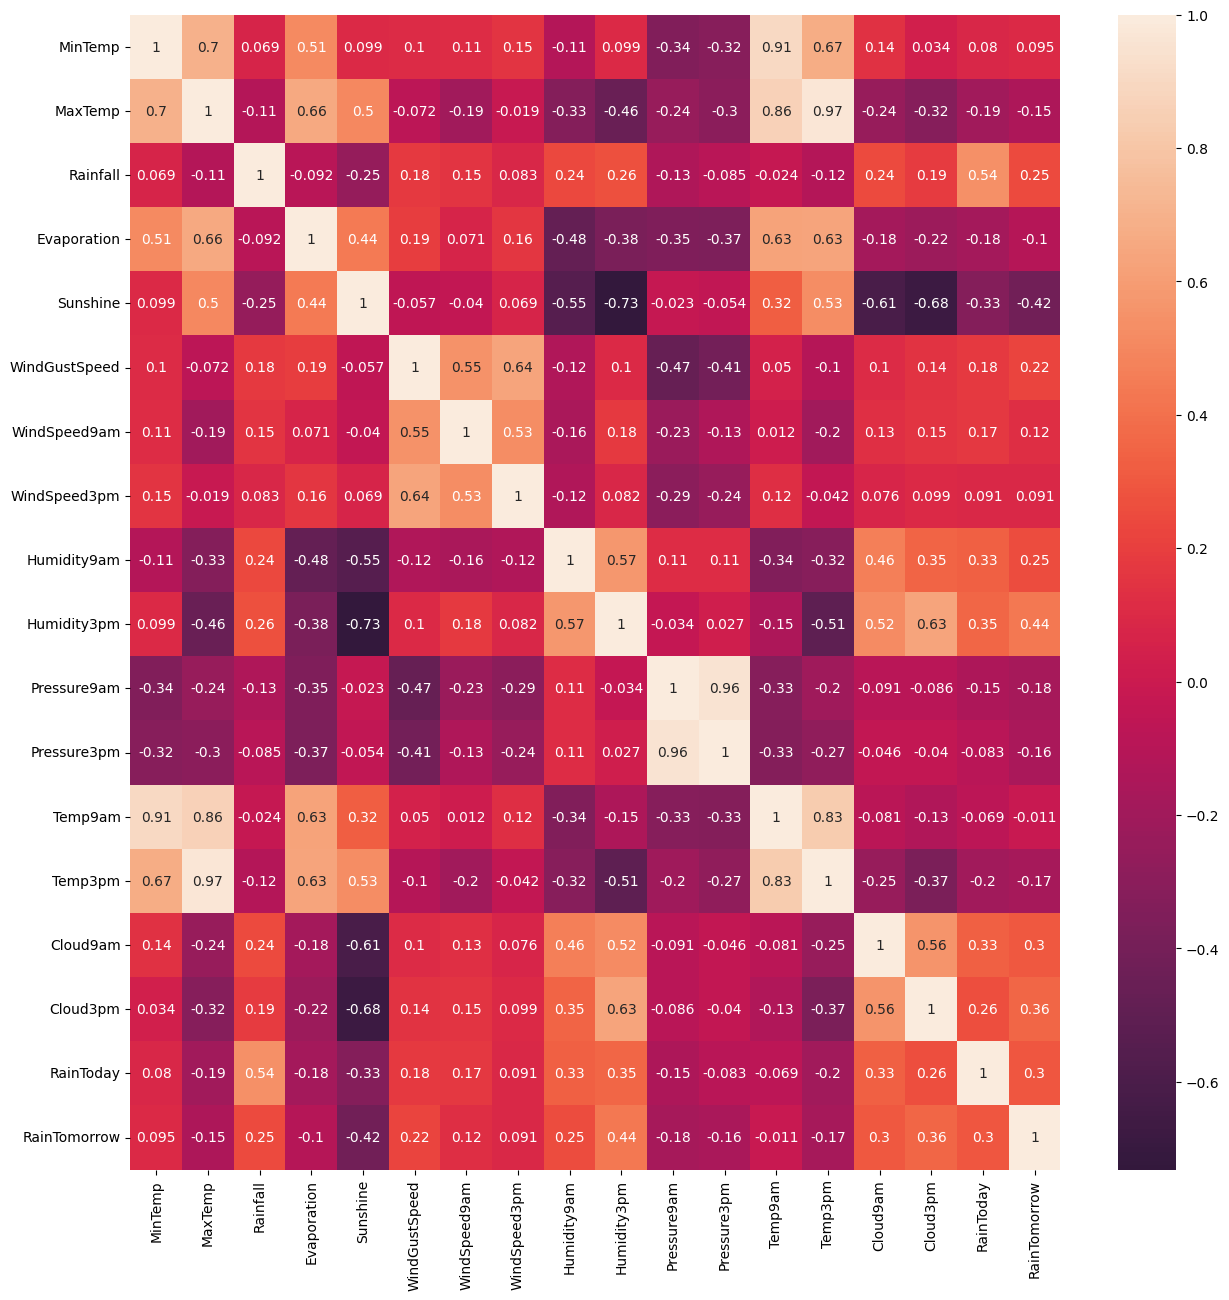

In [343]:
# No inclimos las variables dummies
corr = df_train[["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", 
                 "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", 
                 "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm",
                 "Cloud9am", "Cloud3pm", "RainToday", "RainTomorrow"]].corr(method='pearson').round(3)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

Observando la matriz de correlación podemos notar que existen ciertas variables que están altamente relacionadas.

Por ejemplo, MaxTemp y Temp3pm, y MinTemp y Temp9am. Es de esperar que alguna de estas variables vean sus coeficientes muy minimizados con regularización, debido a su alta colinealidad.

Luego de analizar las relaciones de las variables, verificando cuál es el nivel de correlación de múltiples variables con RainfallTomorrow, e intentamos buscar relaciones adicionales. De esta indagación en el dataset, pudimos encontrar que la variación en un día entre la humedad a las 9 am y 3pm es un buen predictor para la cantidad de lluvia en el día próximo.

In [344]:
#df_train["HumidityChange"] = (df_train["Humidity3pm"] - df_train["Humidity9am"])

# Estandarización

Utilizamos un StandardScaler en las variables numéricas

In [345]:
scaler = StandardScaler()

df_train_numeric = df_train.drop(columns=['WindDir3pmX', 'WindDir3pmY', 'WindDir9amX',
                                          'WindDir9amY', 'WindGustDirX', 'WindGustDirY',
                                          "RainToday", "RainTomorrow",
                                          "Month_2", "Month_3", "Month_4", "Month_5", "Month_6",
                                          "Month_7", "Month_8", "Month_9", "Month_10", "Month_11", "Month_12"
                                          ])

df_train_numeric = pd.DataFrame(scaler.fit_transform(df_train_numeric), columns=df_train_numeric.columns)

df_train = pd.concat([df_train_numeric, 
                      df_train[["WindDir3pmX", "WindDir3pmY", "WindDir9amX", "WindDir9amY", 
                                "WindGustDirX", "WindGustDirY", "RainToday", "RainTomorrow",
                                "Month_2", "Month_3", "Month_4", "Month_5", "Month_6",
                                "Month_7", "Month_8", "Month_9", "Month_10", "Month_11", "Month_12"]]], axis=1)

df_test_numeric = df_test.drop(columns=['WindDir3pmX', 'WindDir3pmY', 'WindDir9amX',
                                          'WindDir9amY', 'WindGustDirX', 'WindGustDirY',
                                          "RainToday", "RainTomorrow",
                                          "Month_2", "Month_3", "Month_4", "Month_5", "Month_6",
                                          "Month_7", "Month_8", "Month_9", "Month_10", "Month_11", "Month_12"
                                          ])

df_test_numeric = pd.DataFrame(scaler.transform(df_test_numeric), columns=df_test_numeric.columns)

df_test = pd.concat([df_test_numeric, 
                      df_test[["WindDir3pmX", "WindDir3pmY", "WindDir9amX", "WindDir9amY", 
                               "WindGustDirX", "WindGustDirY", "RainToday", "RainTomorrow",
                               "Month_2", "Month_3", "Month_4", "Month_5", "Month_6",
                               "Month_7", "Month_8", "Month_9", "Month_10", "Month_11", "Month_12"]]], axis=1)

Verifiquemos la distribución de las variables

In [346]:
df_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,2.419400e+04,2.419400e+04,2.419400e+04,2.419400e+04,2.419400e+04,2.419400e+04,2.419400e+04,2.419400e+04,2.419400e+04,2.419400e+04,...,24194.000000,24194.000000,24194.000000,24194.000000,24194.000000,24194.000000,24194.000000,24194.000000,24194.000000,24194.000000
mean,4.757705e-17,-2.999998e-16,2.055799e-18,-2.936855e-18,4.787074e-17,-7.048452e-18,-7.048452e-18,8.223194e-17,4.875180e-17,6.696030e-17,...,0.093164,0.078491,0.092957,0.086344,0.083244,0.081301,0.079855,0.083698,0.081962,0.075515
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,...,0.290668,0.268948,0.290378,0.280877,0.276256,0.273303,0.271073,0.276941,0.274313,0.264225
min,-3.201704e+00,-3.879250e+00,-3.083147e-01,-1.790507e+00,-2.175494e+00,-2.351062e+00,-1.342404e+00,-1.843172e+00,-3.923151e+00,-2.678374e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.599380e-01,-5.586192e-01,-3.083147e-01,-7.384197e-01,-7.093857e-01,-6.849399e-01,-6.834600e-01,-6.472852e-01,-6.246794e-01,-7.057633e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.184778e-01,-1.974500e-02,-3.083147e-01,-1.973463e-01,1.160701e-01,-1.778593e-01,-1.343399e-01,-1.037004e-01,5.776295e-02,-1.534942e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.856913e-01,5.773859e-01,-2.135342e-01,5.992339e-01,7.505623e-01,4.741014e-01,5.246042e-01,5.486014e-01,7.402053e-01,7.243798e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.866762e+00,3.650425e+00,2.531798e+01,2.631525e+01,2.228991e+00,6.921268e+00,1.293472e+01,7.180336e+00,1.593258e+00,2.154523e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Definimos X e y

In [347]:
X_train = df_train.drop(columns=["RainTomorrow"])
y_train = df_train["RainTomorrow"]

X_test = df_test.drop(columns=["RainTomorrow"])
y_test = df_test["RainTomorrow"]

# Regresión logística

Intentaremos encontrar una solución al problema utilizando la regresión logística.

Recordemos que la regresión logística de sklearn regulariza con Ridge por defecto.

In [348]:
logisticRegModel = LogisticRegression()

logisticRegModel.fit(X_train, y_train)

y_pred = logisticRegModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4630
         1.0       0.68      0.43      0.53      1419

    accuracy                           0.82      6049
   macro avg       0.76      0.68      0.71      6049
weighted avg       0.80      0.82      0.80      6049



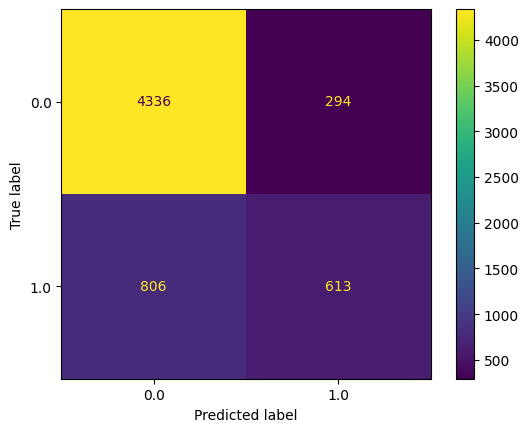

In [349]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

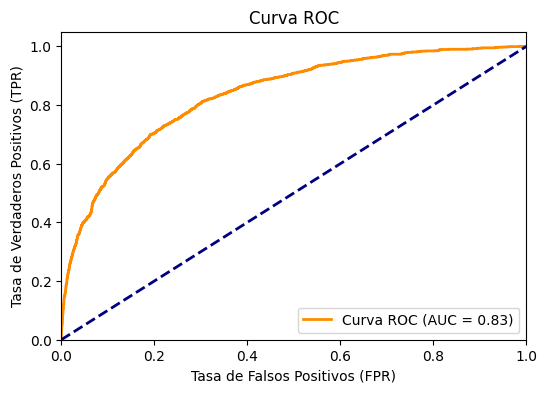

In [350]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logisticRegModel.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Consideramos que un buen valor en este problema sería uno que tenga la menor cantidad de falsos negativos (días que llovieron y predijimos que no llovería), ya que consideramos que en el mundo real, el peor caso posible sería predecir que no llovería y que llueva.

Sin embargo, claramente hay que conseguir un balance, ya que con esta regla, simplemente predecir que llueve siempre sería una solución "óptima", pero que no aportaría ningún valor.

Veamos los thresholds a los que equivalen los valores de la curva roc

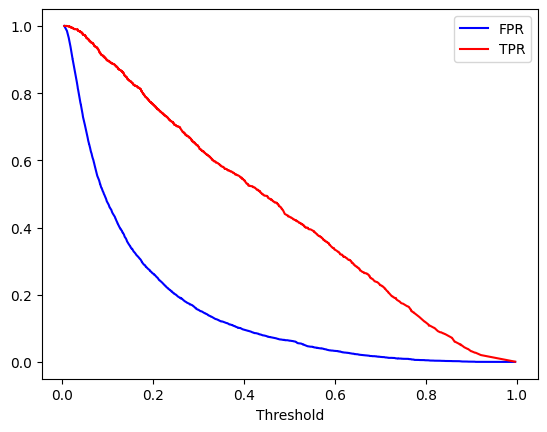

In [351]:
# plot fpr and tpr by thresholds
plt.plot(thresholds, fpr, color='blue', label='FPR')
plt.plot(thresholds, tpr, color='red', label='TPR')
plt.legend()
plt.xlabel('Threshold')
plt.show()

Observándo el gráfico anterior, tenemos que si utilizamos un threshold de 0.5, tendremos un FPR de ~0.1, y un TPR de ~0.5. Como dijimos, lo ideal sería minimizar los Falsos Negativos (o maximizar los Verdaderos Positivos), por lo que un 50% de tasa de error no sería deseable.

Un buen threshold, con esta consideración, sería de aproximadamente 0.2. En este tendremos un TPR de ~0.8, lo cual es relativamente alto, sin que nuestro FPR sea demasiado alto. De hecho, se nota como esta curva comienza a crecer exponencialmente a luego de este punto.

In [352]:
indice_threshold_ideal = np.abs(thresholds - 0.17).argmin()
fpr[indice_threshold_ideal], tpr[indice_threshold_ideal]

(0.3095032397408207, 0.8146582100070472)

## Balanceo de clases

Recordemos que las clases de nuestro dataset están altamente desbalanceadas: Tenemos un 76.8% de observaciones para la clase 0 (no lluvia). Esto puede causar que nuestro modelo tienda a preferir predecir esta clase. Por esto, es importante que entrenemos un modelo donde las clases estén balanceadas, dándole un mayor costo a las malas predicciones en la clase minoritaria durante su entrenamiento.

In [353]:
logisticRegModel_balanced = LogisticRegression(class_weight="balanced")

logisticRegModel_balanced.fit(X_train, y_train)

y_pred = logisticRegModel_balanced.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      4630
         1.0       0.50      0.73      0.60      1419

    accuracy                           0.77      6049
   macro avg       0.70      0.75      0.72      6049
weighted avg       0.81      0.77      0.78      6049



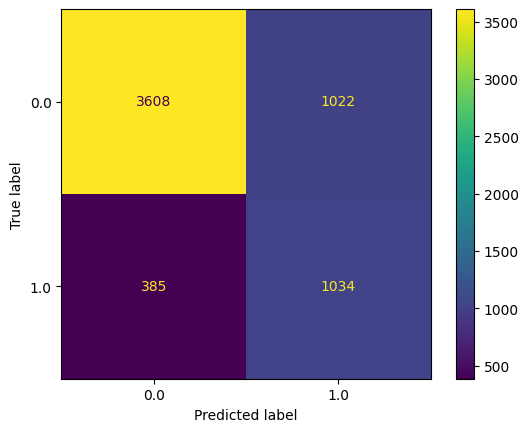

In [354]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Observamos que tenemos un recall mucho mayor en la clase 1 (que es lo que buscamos priorizar), a costa de una mayor cantidad de falsos positivos.

Veamos la curva ROC para este modelo.

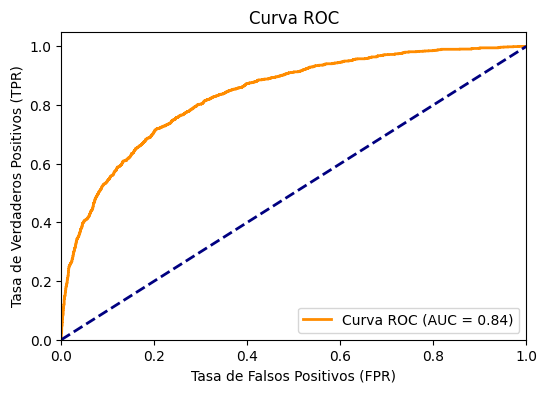

In [355]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logisticRegModel_balanced.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

A simple vista obtenemos un AUC ligeramente mejor (AUC = 0.84 vs 0.82 para el modelo sin balanceo).

Veamos el TPR y FPR para diferentes umbrales de decisión.

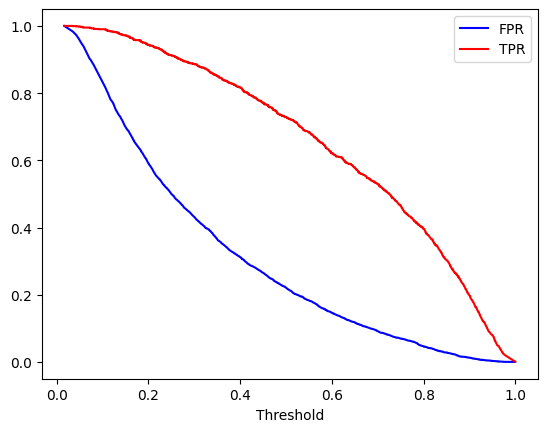

In [356]:
# plot fpr and tpr by thresholds
plt.plot(thresholds, fpr, color='blue', label='FPR')
plt.plot(thresholds, tpr, color='red', label='TPR')
plt.legend()
plt.xlabel('Threshold')
plt.show()

Vemos que en este nuevo modelo, para todos los umbrales, tanto el TPR como el FPR incrementan.

In [357]:
indice_threshold_ideal = np.abs(thresholds - 0.4).argmin()
fpr[indice_threshold_ideal], tpr[indice_threshold_ideal]

(0.31123110151187905, 0.8167723749119098)

Vemos que nuestro modelo es aproximadamente igual cuando elegimos un umbral de decisión con un TPR de 4/5, tanto en su FPR como TPR.

# Modelo Base

Como modelo base, podemos utilizar las variables de mayor correlación según la matriz de correlación.

Utilizaremos las variables con correlación > 0.3:
- `Sunshine`
- `Humidity3pm`
- `Cloud3pm`

Luego, si las nubes y humedad superan un cierto umbral (la media) y la cantidad de sol es menor a cierto otro umbral (1er cuartil), prediciremos que mañana lloverá, y en caso contrario, que no.


In [358]:
df_train[["Sunshine", "Humidity3pm", "Cloud3pm", "RainToday"]].describe()

,Sunshine,Humidity3pm,Cloud3pm,RainToday
count,2.419400e+04,2.419400e+04,2.419400e+04,24194.000000
mean,4.787074e-17,6.696030e-17,-8.575617e-17,0.231553
std,1.000021e+00,1.000021e+00,1.000021e+00,0.420613
min,-2.175494e+00,-2.678374e+00,-2.021253e+00,0.000000
25%,-7.093857e-01,-7.057633e-01,-7.274781e-01,0.000000
50%,1.160701e-01,-1.534942e-02,1.350388e-01,0.000000
75%,7.505623e-01,7.243798e-01,9.975556e-01,0.000000
max,2.228991e+00,2.154523e+00,1.428814e+00,1.000000


In [359]:
umbral_humedad = df_train["Humidity3pm"].median()
umbral_nubes = df_train["Cloud3pm"].median()
umbral_sol = df_train["Sunshine"].quantile(0.25)
umbral_lluvia = 1

def basemodel_selector(sunshine, humidity3pm, cloud3pm, RainToday):
    return int(humidity3pm > umbral_humedad and cloud3pm > umbral_nubes and sunshine < umbral_sol)

print(umbral_humedad, umbral_nubes, umbral_sol, umbral_lluvia)

-0.015349416039945508 0.13503875645481464 -0.7093856790285159 1


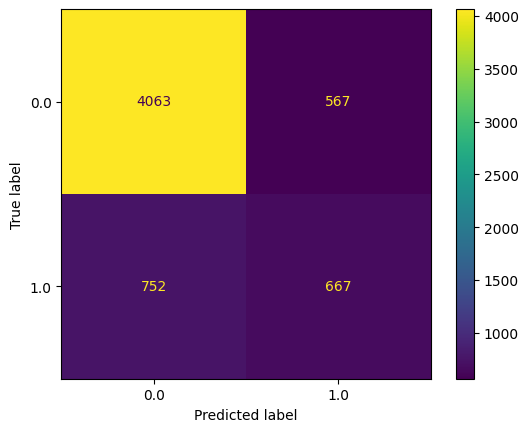

In [360]:
y_pred = X_test.apply(lambda row: basemodel_selector(row["Sunshine"], row["Humidity3pm"], row["Cloud3pm"], row["RainToday"]), axis=1)

# confussion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      4630
         1.0       0.54      0.47      0.50      1419

    accuracy                           0.78      6049
   macro avg       0.69      0.67      0.68      6049
weighted avg       0.77      0.78      0.78      6049



Vemos que nuestro modelo tiene un performance inferior al de la regresión logística. Es claro que nuestro modelo funciona bastante mejor que el azar para predecir días sin lluvia pero es peor para predecir días de lluvia.

Además, es menos flexible al no estar prediciendo probabilidades, y por lo tanto no poder ajustar un umbral de decisión.

No consideramos haber conseguido un buen fitting: para empezar, tenemos un con métricas relativamente peores al de la regresión logística. Nuestro modelo no es capaz de predecir la lluvia en más del 50% de los días en los que llueve. Claramente si ajustamos los umbrales que elegimos podríamos intentar mejorar este modelo, pero a costa de peores predicciones para la clase 0.